In [2]:
import numpy as np
from numpy import exp

def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

def mult(a, b):
    res = np.matrix(np.zeros(a.shape), dtype = np.float64)
    for i in range(a.shape[0]):
        res[i] = a[i]*b[i]
    return res

def NewtonSolver(f, u0, eps=10**-12, h = 10**-5):
    global N, x
    u = u0
    dx = np.matrix(np.ones(u0.shape), dtype = np.float64)
    i = 0
    fu = np.zeros( (u0.shape[0], u0.shape[0]), dtype = np.float64)
    while (sum(mult(dx,dx)).item(0))**1/2 > eps :
        print("Iteration:", i)
        i+=1
        du = np.matrix(np.zeros(u0.shape), dtype = np.float64)
        for j in range( u0.shape[0]):
            du[j-1] = 0
            du[j] = h
            val = ( f(u+du) - f(u-du) )/(2.0*h)
            for k in range( u0.shape[0]):
                fu[j][k]= val[k]
        fu = fu.T
        dx = -1 * np.linalg.inv(fu) * f(u)
        u = u + dx
        print('||dx||:',(sum(mult(dx,dx)).item(0))**1/2)
    return u

global N, k0, k1, u0v, uNv, x
N = 8
k0 = 1.0
k1 = 0.5
u0v = 0.0
uNv = 0.0
lambda0 = 40.0

def F(u):
    global N, k0, k1, u0v, uNv, x
    res = np.matrix( np.zeros((N, 1)), dtype = np.float64)
    
    i = 0
    res[i] = (u[i+1] - u[i]) * (k0 + k1 * (u[i]**2 + u[i+1]**2)/2.0) - u[i]*(k0 + k1 * u[i]**2/2.0) + u[-1]*u[i]*(x[i]-x[i+1])**2
    
    for i in range(1, N-2):
        res[i] = (u[i+1] - u[i]) * (k0 + k1 * (u[i]**2 + u[i+1]**2)/2) - (u[i] - u[i-1])*(k0 + k1 * (u[i]**2 + u[i-1]**2)/2) + u[-1]*u[i]*(x[i]-x[i+1])**2
        
    i = N-2
    res[i] = (uNv - u[i]) * (k0 + k1 * u[i]**2) - (u[i] - u[i-1])*(k0 + k1 * (u[i]**2 + u[i-1]**2)/2) + u[-1]*u[i]*(x[i]-x[i+1])**2
    
    res[N-1] = u[N//2-1] - u[N//2-3] - 2* (x[1]-x[0])
    
    return res

prev_answer = np.matrix(np.ones((N//2, 1)), dtype = np.float64)
lambdas = []

for j in range(1,8):
    print('Число отрезков:', N)
    
    x = np.linspace(0, 1, N+1)
    u0 = np.matrix(np.zeros((N, 1)), dtype = np.float64)
    
    for i in range(N//2):
        u0[2*i+1] = prev_answer[i]
        
    for i in range(2,N-2,2):
        u0[i] = (u0[i-1] + u0[i+1])

    u0[0] = (u0v + u0[1])/2
    u0[-2] = (uNv + u0[-3])/2
    
    if j==1:
        u0[-1] = lambda0
    
    prev_answer = NewtonSolver(F, u0)
    lambdas.append(prev_answer[-1:])
    N*=2

Число отрезков: 8
Iteration: 0
||dx||: 320.5244121259173
Iteration: 1
||dx||: 4.531268023416803
Iteration: 2
||dx||: 0.05312040074151286
Iteration: 3
||dx||: 1.372591205300824e-07
Iteration: 4
||dx||: 6.880933324681253e-14
Число отрезков: 16
Iteration: 0
||dx||: 20.10343754545606
Iteration: 1
||dx||: 4842.720198551624
Iteration: 2
||dx||: 528.4460512475224
Iteration: 3
||dx||: 162.9677445710179
Iteration: 4
||dx||: 27.353514726230692
Iteration: 5
||dx||: 33156.20503289256
Iteration: 6
||dx||: 60041.770948817306
Iteration: 7
||dx||: 30.21471778232515
Iteration: 8
||dx||: 36.676247248551
Iteration: 9
||dx||: 7.6559096249394
Iteration: 10
||dx||: 0.25303088007110514
Iteration: 11
||dx||: 0.00024228269479462683
Iteration: 12
||dx||: 2.1946326324809715e-10
Iteration: 13
||dx||: 1.8469756971994887e-22
Число отрезков: 32
Iteration: 0
||dx||: 625.9346089545202
Iteration: 1
||dx||: 38952.188394733355
Iteration: 2
||dx||: 4995.912994317272
Iteration: 3
||dx||: 251.96929818194593
Iteration: 4
||d

In [3]:
lambdas = [t.item(0) for t in lambdas]

<IPython.core.display.Javascript object>


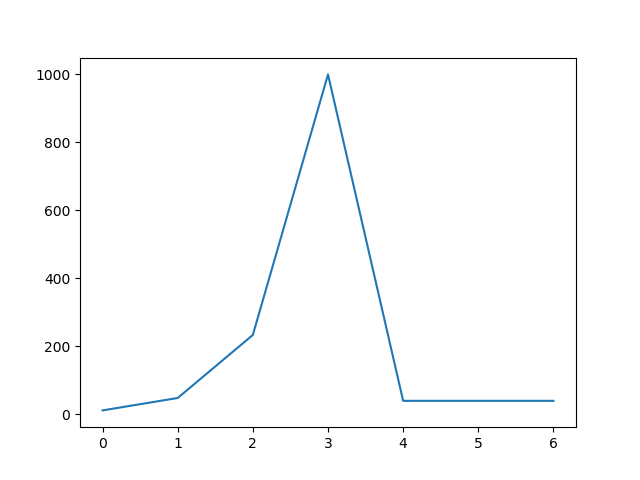

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(lambdas)

In [5]:
def eitken_thickening(U2, U1, U0, r):
    return U2+(U2-U1)/((U1-U0)/(U2-U1)-1)

In [6]:
eitken_vals1 = [eitken_thickening(lambdas[i], lambdas[i-1], lambdas[i-2], 1/2.0) for i in range(2, len(lambdas))]
eitken_vals1

[2.4891167777552994,
 -11.284244358594378,
 573.718207171493,
 39.60054643155701,
 39.60239441722884]

In [7]:
eitken_vals2 = [eitken_thickening(eitken_vals1[i], eitken_vals1[i-1], eitken_vals1[i-2],1/2) for i in range(2,len(eitken_vals1))]
eitken_vals2

[2.1722945665381985, 294.5165937677414, 39.60239441083504]

In [8]:
eitken_vals3 = [ eitken_thickening(eitken_vals2[i], eitken_vals2[i-1], eitken_vals2[i-2],1/2) for i in range(2,len(eitken_vals2)) ]
eitken_vals3[0]

158.34198311522624

In [ ]:
answer = [0] + [t.item(0) for t in prev_answer[:-1]] + [0]

In [ ]:
plt.figure()
plt.plot(np.linspace(0,1,len(answer)), answer) 